# AOS_ISR_options

We copy the contents of `/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/baselineCloseLoop`, which was done with `2020_24` stack.  It was also done with the latest update to flats , and with `doOverscan` option. The aim here is to test some other ISR options and compare the results. 

In [2]:
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18
# import os
# base_dir = '/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/baselineCloseLoop'
# os.listdir(base_dir)

# all that was copied 
import os
base_dir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baselineCloseLoop'
os.listdir(base_dir)

['fake_flats',
 'input',
 'iter0',
 'opdcatalog_9006000.pars',
 'close_loop_timing_dict_0.json',
 'iter1',
 'opdcatalog_9006010.pars',
 'close_loop_timing_dict_1.json',
 'iter2',
 'opdcatalog_9006020.pars',
 'close_loop_timing_dict_2.json',
 'iter3',
 'opdcatalog_9006030.pars',
 'close_loop_timing_dict_3.json',
 'iter4',
 'opdcatalog_9006040.pars',
 'close_loop_timing_dict_4.json',
 'fwhmIters.png',
 'close_loop_timing_dict.json']

In [ ]:
# each iteration was ISRd, but the is only raw stuff for the last one. : 9006041 (intra) and 9006042 (extra). 



## run1 : doFlat and doOverscan 

In [3]:
# run1 had used config.isr.doBias=False
# config.isr.doDark=False
# config.isr.doFlat=True
# config.isr.doFringe=False
# config.isr.doDefect=False
# config.isr.doOverscan=True
import sys
sys.path.append('../analysis_tools/')
import analysisTools as at 

In [11]:
data_dir = base_dir
rawImage = at.readImage(data_dir, focalType='intra', 
                     raft='R22', detector='S00',
                     imgType='raw', obsId=9006041)

isrImage = at.readImage(data_dir, focalType='intra', 
                     raft='R22', detector='S00',
                     imgType='postISR', obsId=9006041)



data_id is
{'visit': 9006041, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading raw images from the following repo_dir:
/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/baselineCloseLoop/input/


Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['AIRMASS'] in header"
Ignoring Error calculating property 'temperature' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['TEMPERA'] in header"
Ignoring Error calculating property 'pressure' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['PRESS'] in header"


Done

data_id is
{'visit': 9006041, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/baselineCloseLoop/input/rerun/run1
Done



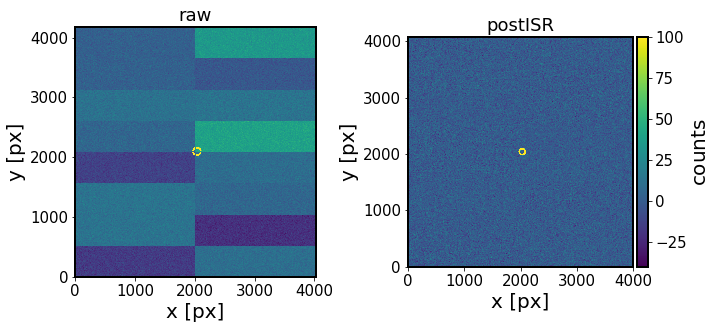

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import imp
imp.reload(at)
fig,ax = plt.subplots(1,2,figsize=(10,5))
at.plotImage(rawImage, ax=ax[0], log=False, sensor='R22_S00', focalType='intra',
             imgType='raw', plotArgs={ 'vmax':1100}, addColorbar=False, addTitle=True,title='raw')
at.plotImage(isrImage, ax=ax[1], log=False, sensor='R22_S00', focalType='intra',
             imgType='raw', plotArgs={ 'vmax':100}, addColorbar=True, addTitle=True, title='postISR')

Zoom in on the donut:  

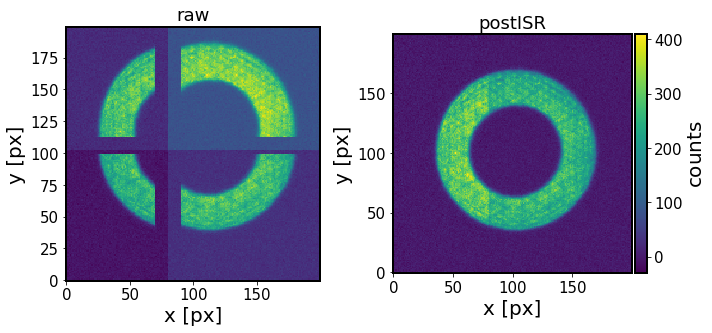

In [58]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

donutCentreX = 2030
donutCentreY = 2085
dX = 100
dY = 100
xMin, xMax = donutCentreX-dX, donutCentreX+dX
yMin, yMax = donutCentreY-dY, donutCentreY+dY

at.plotImage(rawImage[xMin:xMax,
                    yMin:yMax], ax=ax[0], log=False, sensor='R22_S00', focalType='intra',
             imgType='raw',  addColorbar=False, addTitle=True,title='raw')

donutCentreX = 2020
donutCentreY = 2040
dX = 100
dY = 100
xMin, xMax = donutCentreX-dX, donutCentreX+dX
yMin, yMax = donutCentreY-dY, donutCentreY+dY

at.plotImage(isrImage[xMin:xMax,
                    yMin:yMax], ax=ax[1], log=False, sensor='R22_S00', focalType='intra',
             imgType='raw',addColorbar=True, addTitle=True, title='postISR')



## run2 : doFlat only 

In [7]:
input_dir = os.path.join(data_dir, 'input')
isrSettings = {'doBias':False, 'doDark':False,
               'doFlat':True, 'doFringe':False, 
               'doDefect':False,'doOverscan':False
              }
content = ""
for setting in isrSettings.keys():
    content += "config.isr.%s=%s\n"%(setting,str(isrSettings[setting]))
isrConfigFname =  'isr_config2.py'
config_path = os.path.join(input_dir,isrConfigFname)

# Write into file
fid = open(config_path, "w")
fid.write(content)
fid.close()




In [60]:
import subprocess

cmd = ['runIsr.py',input_dir, '--id', '--rerun=run2',
        '--configfile', config_path,
        '--no-versions',]# '--clobber-config']

a = ''
for x in cmd:
    a += ' %s '% x
print('The command run by subprocess is ')
print('\n',a)

proc = subprocess.Popen(cmd, stdout=subprocess.PIPE)
output = proc.communicate()[0]

The command run by subprocess is 

  runIsr.py  /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baselineCloseLoop/input  --id  --rerun=run2  --configfile  /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baselineCloseLoop/input/isr_config2.py  --no-versions 


In [69]:
#https://www.endpoint.com/blog/2015/01/28/getting-realtime-output-using-python
#output.decode('ascii')

Show the result:

In [72]:
data_dir = base_dir
isrImage2 = at.readImage(data_dir, focalType='intra', 
                     raft='R22', detector='S00',
                     imgType='postISR', obsId=9006041,rerun='run2')



data_id is
{'visit': 9006041, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baselineCloseLoop/input/rerun/run2
Done



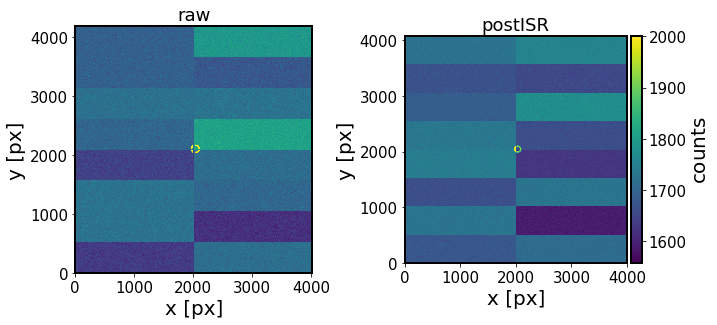

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import imp
imp.reload(at)
fig,ax = plt.subplots(1,2,figsize=(10,5))
at.plotImage(rawImage, ax=ax[0], log=False, sensor='R22_S00', focalType='intra',
             imgType='raw', plotArgs={ 'vmax':1100}, addColorbar=False, addTitle=True,title='raw')
at.plotImage(isrImage2, ax=ax[1], log=False, sensor='R22_S00', focalType='intra',
             imgType='raw', plotArgs={ 'vmax':2000}, addColorbar=True, addTitle=True, title='postISR')

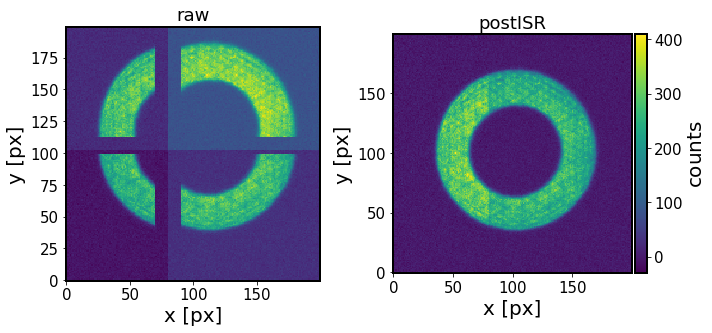

In [80]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

donutCentreX = 2030
donutCentreY = 2085
dX = 100
dY = 100
xMin, xMax = donutCentreX-dX, donutCentreX+dX
yMin, yMax = donutCentreY-dY, donutCentreY+dY

at.plotImage(rawImage[xMin:xMax,
                    yMin:yMax], ax=ax[0], log=False, sensor='R22_S00', focalType='intra',
             imgType='raw',  addColorbar=False, addTitle=True,title='raw')

donutCentreX = 2020
donutCentreY = 2040
dX = 100
dY = 100
xMin, xMax = donutCentreX-dX, donutCentreX+dX
yMin, yMax = donutCentreY-dY, donutCentreY+dY

at.plotImage(isrImage[xMin:xMax,
                    yMin:yMax], ax=ax[1], log=False, sensor='R22_S00', focalType='intra',
             imgType='raw',addColorbar=True, addTitle=True, title='postISR')


## run3 : doOverscan only

In [8]:
data_dir = base_dir
input_dir = os.path.join(data_dir, 'input')
isrSettings = {'doBias':False, 'doDark':False,
               'doFlat':False, 'doFringe':False, 
               'doDefect':False,'doOverscan':True
              }
content = ""
for setting in isrSettings.keys():
    content += "config.isr.%s=%s\n"%(setting,str(isrSettings[setting]))
isrConfigFname =  'isr_config3.py'
config_path = os.path.join(input_dir,isrConfigFname)

# Write into file
fid = open(config_path, "w")
fid.write(content)
fid.close()

In [10]:
p

In [13]:
cmd = ['runIsr.py',input_dir, '--id', '--rerun=run3',
        '--configfile', config_path,
        '--no-versions', '--clobber-config']

a = ''
for x in cmd:
    a += ' %s '% x
print('The command run by subprocess is ')
print('\n',a)

import subprocess

# run that to just do the process and read the buffer at the end 
proc = subprocess.Popen(cmd, stdout=subprocess.PIPE)
output = proc.communicate()[0]

# run that to read the buffer line-by-line, as the process gets executed...
# p = subprocess.Popen(cmd, stdout=subprocess.PIPE, bufsize=1)
# for line in iter(p.stdout.readline, b''):
#     print(line.decode('ascii'),)
# p.stdout.close()
# p.wait()

The command run by subprocess is 

  runIsr.py  /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baselineCloseLoop/input  --id  --rerun=run3  --configfile  /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baselineCloseLoop/input/isr_config3.py  --no-versions  --clobber-config 


data_id is
{'visit': 9006041, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading raw images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baselineCloseLoop/input/


Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['AIRMASS'] in header"
Ignoring Error calculating property 'temperature' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['TEMPERA'] in header"
Ignoring Error calculating property 'pressure' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['PRESS'] in header"


Done

data_id is
{'visit': 9006041, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baselineCloseLoop/input/rerun/run3
Done



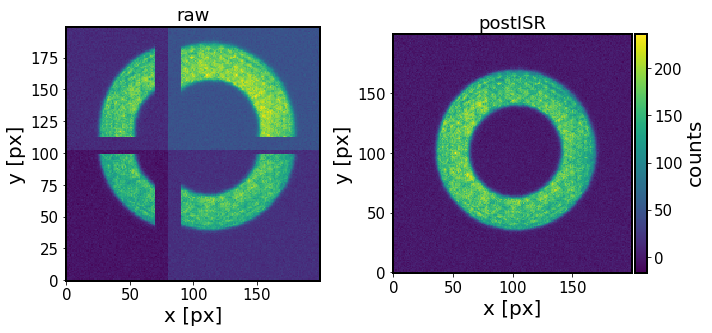

In [12]:
import sys
sys.path.append('../analysis_tools/')
import analysisTools as at 

data_dir = base_dir
rawImage = at.readImage(data_dir, focalType='intra', 
                     raft='R22', detector='S00',
                     imgType='raw', obsId=9006041)

isrImage3 = at.readImage(data_dir, focalType='intra', 
                     raft='R22', detector='S00',
                     imgType='postISR', obsId=9006041, rerun='run3')


%matplotlib inline
import matplotlib.pyplot as plt
import imp
imp.reload(at)
fig,ax = plt.subplots(1,2,figsize=(10,5))

donutCentreX = 2030
donutCentreY = 2085
dX = 100
dY = 100
xMin, xMax = donutCentreX-dX, donutCentreX+dX
yMin, yMax = donutCentreY-dY, donutCentreY+dY

at.plotImage(rawImage[xMin:xMax,yMin:yMax], ax=ax[0], log=False, sensor='R22_S00', focalType='intra',
             addColorbar=False, addTitle=True,title='raw')

donutCentreX = 2020
donutCentreY = 2040
dX = 100
dY = 100
xMin, xMax = donutCentreX-dX, donutCentreX+dX
yMin, yMax = donutCentreY-dY, donutCentreY+dY

at.plotImage(isrImage3[xMin:xMax,yMin:yMax], ax=ax[1], log=False, sensor='R22_S00', focalType='intra',
             addColorbar=True, addTitle=True, title='postISR')

In [14]:
isrImage1 = at.readImage(data_dir, focalType='intra', 
                     raft='R22', detector='S00',
                     imgType='postISR', obsId=9006041, rerun='run1')


isrImage2 = at.readImage(data_dir, focalType='intra', 
                     raft='R22', detector='S00',
                     imgType='postISR', obsId=9006041, rerun='run2')




data_id is
{'visit': 9006041, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baselineCloseLoop/input/rerun/run1
Done

data_id is
{'visit': 9006041, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baselineCloseLoop/input/rerun/run2
Done



Plot all three postISR images:

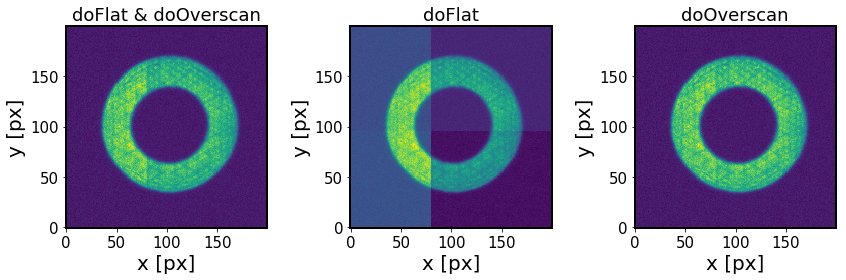

In [19]:
fig,ax = plt.subplots(1,3,figsize=(12,4))

at.plotImage(isrImage1[xMin:xMax,yMin:yMax], ax=ax[0], log=False, sensor='R22_S00', focalType='intra',
             addColorbar=False, addTitle=True, title='doFlat & doOverscan')

at.plotImage(isrImage2[xMin:xMax,yMin:yMax], ax=ax[1], log=False, sensor='R22_S00', focalType='intra',
             addColorbar=False, addTitle=True, title='doFlat')

at.plotImage(isrImage3[xMin:xMax,yMin:yMax], ax=ax[2], log=False, sensor='R22_S00', focalType='intra',
             addColorbar=False, addTitle=True, title='doOverscan')

plt.savefig('comcam_baseline_ISR_compare.png', bbox_inches='tight',dpi=100)

In [ ]:
p